In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
#this dataset has 10 classes
#so i'm doing categorical classification

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_train.shape

(50000, 1)

In [7]:
print(y_train[:5])
print(y_train[0])
type(y_train[0])
#here, we can see that this is a two dimensional array. but we dont need y_train to be a 2d array

[[6]
 [9]
 [9]
 [4]
 [1]]
[6]


numpy.ndarray

In [8]:
y_train=y_train.reshape(-1,)
print(y_train[:5])
#now it is a 1d array. it contains the numbers which represent the class of each of the corresponding x_train images

[6 9 9 4 1]


In [9]:
#doing the same with the y_test set
y_test= y_test.reshape(-1,)
print(y_test[:5])

[3 8 8 0 6]


In [10]:
classes=["airplane", 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
classes[9]

'truck'

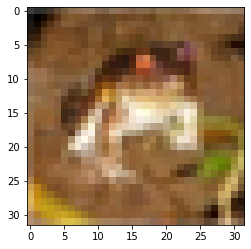

In [12]:
plt.imshow(x_train[0])
#since the images are of size 32 x 32, i will write a function to plot the images according to their size 

In [13]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15, 2)) #resizing the image(only the size of the printed image. not the actual image size)
    plt.imshow(x[index]) #the image present at the given index in x
    plt.xlabel(classes[y[index]]) #xlabel of the plot= the class of the number present at the given index in y

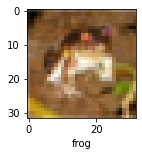

In [14]:
plot_sample(x_train, y_train, 0) #checking for x_train, y_train

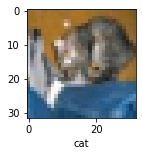

In [16]:
plot_sample(x_test, y_test, 0) #checking for x_test, y_test

In [17]:
x_train=x_train/255
x_test=x_test/255
#normalising the x datasets
#dividing by 255 because the rgb pixel alues are in the range of 0 to 255

In [18]:
#trying with a normal neural network
model=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [19]:
model.compile(optimizer='SGD', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 7s 2ms/step - loss: 1.8382 - accuracy: 0.3480
Epoch 2/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6529 - accuracy: 0.4158
Epoch 3/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5680 - accuracy: 0.4466
Epoch 4/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5089 - accuracy: 0.4684
Epoch 5/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4632 - accuracy: 0.4839


In [25]:
#using cnn
model=models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
#for multi-class classification, im using softmax as the activation function

In [26]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5216 - accuracy: 0.4460
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1690 - accuracy: 0.5849
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0412 - accuracy: 0.6340
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9492 - accuracy: 0.6675
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8850 - accuracy: 0.6900
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8265 - accuracy: 0.7123
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7803 - accuracy: 0.7289
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7414 - accuracy: 0.7425
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7081 - accuracy: 0.7523
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.671

In [27]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9001 - accuracy: 0.7011


[0.9001333713531494, 0.7010999917984009]

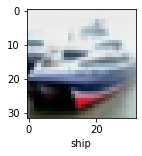

In [28]:
plot_sample(x_test, y_test, 1)

In [29]:
y_pred=model.predict(x_test)
y_pred[1]
#these are the probability distrubutions for each class

array([5.6284941e-03, 3.5912153e-01, 4.7965086e-06, 7.4859338e-07,
       8.4812990e-07, 1.9508596e-08, 1.0872505e-07, 1.1267760e-07,
       6.3334185e-01, 1.9014666e-03], dtype=float32)